In [3]:
# from src.utils import model_selection, create_plots
from src.utils import create_plots, model_comparasion
# Replace model_selection with model_selection_parallel 
from src.load_results import model_selection_parallel as model_selection

In [4]:
Vanilla_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"vanilla/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= ("0","1","2","3","4"),
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    n_jobs=5,
    index_column_names = ["lr"],
    save_path = "results/Moji_Vanilla_df.pkl"
    )

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    3.9s remaining:    5.9s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    4.4s finished


In [2]:
Moji_Adv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_Adv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_Adv_df.pkl"
    )

index epoch       dev_rms_TPR            \
                                  mean   var        mean       var   
35  (3.1622776601683795, 1, 0.0)   7.0  11.0    0.918121  0.000111   

   dev_accuracy             dev_DTO           test_rms_TPR            \
           mean       var      mean       var         mean       var   
35     0.736425  0.000185  0.037474  0.000943     0.917136  0.000322   

   test_accuracy           test_DTO           final_DTO log_lambda  
            mean      var      mean       var                       
35      0.744886  0.00019  0.038799  0.000925  0.066922        0.5

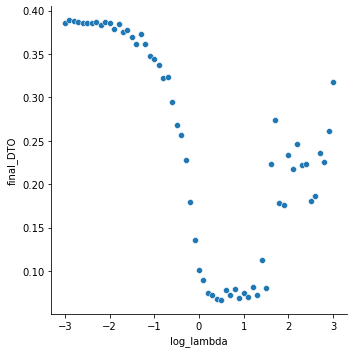

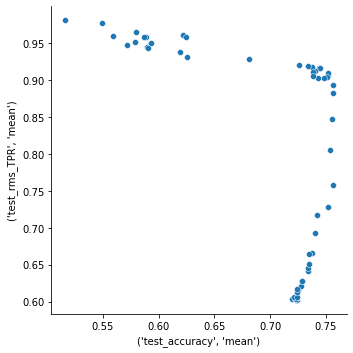

In [3]:
create_plots(input_df = Moji_Adv_df)

In [4]:
Moji_DAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_DAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_DAdv_df.pkl"
    )


index epoch       dev_rms_TPR            \
                                     mean   var        mean       var   
179  (3.1622776601683795, 3, 100.0)  12.0  35.5    0.925327  0.000212   

    dev_accuracy             dev_DTO          test_rms_TPR            \
            mean       var      mean      var         mean       var   
179      0.73735  0.000066  0.023413  0.00009      0.92475  0.000468   

    test_accuracy            test_DTO           final_DTO log_lambda  
             mean       var      mean       var                       
179      0.746862  0.000052  0.029076  0.000206  0.063965        0.5

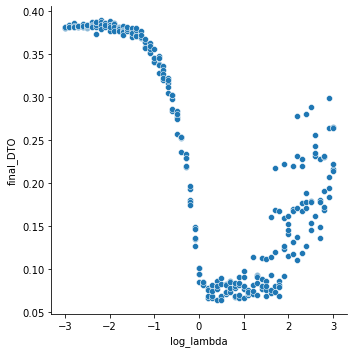

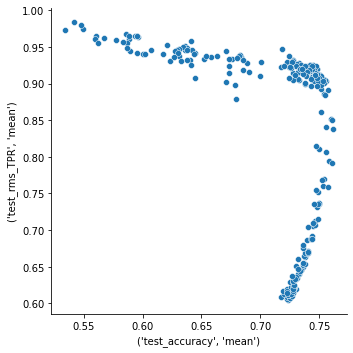

In [5]:
create_plots(input_df = Moji_DAdv_df)

In [6]:
Moji_GatedAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune2/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_GatedAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_GatedAdv_df.pkl"
    )

index epoch      dev_rms_TPR           dev_accuracy  \
                                 mean  var        mean       var         mean   
47  (50.11872336272725, 1, 0.0)  15.2  3.2    0.942501  0.000086     0.731275   

               dev_DTO           test_rms_TPR           test_accuracy  \
         var      mean       var         mean       var          mean   
47  0.000013  0.037601  0.000123     0.933813  0.000069      0.739085   

              test_DTO           final_DTO log_lambda  
         var      mean       var                       
47  0.000026  0.037262  0.000627  0.042901        1.7

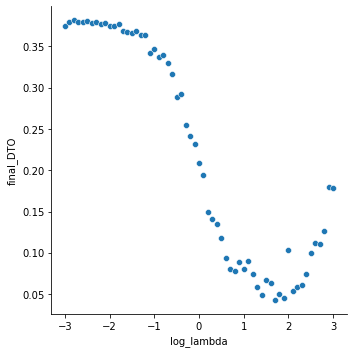

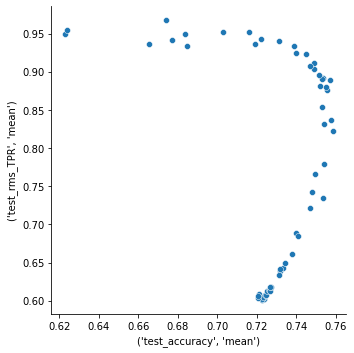

In [7]:
create_plots(
    input_df = Moji_GatedAdv_df
    )

In [8]:
Moji_BTGatedAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune2/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_BTGatedAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_BTGatedAdv_df.pkl"
    )

index epoch        dev_rms_TPR           dev_accuracy            \
                    mean    var        mean       var         mean       var   
40  (10.0, 1, 0.0)  16.6  280.8    0.915839  0.001516     0.708675  0.001581   

     dev_DTO           test_rms_TPR           test_accuracy            \
        mean       var         mean       var          mean       var   
40  0.106046  0.000687     0.904159  0.002921      0.713853  0.001716   

    test_DTO           final_DTO log_lambda  
        mean       var                       
40  0.119564  0.000846  0.084921        1.0

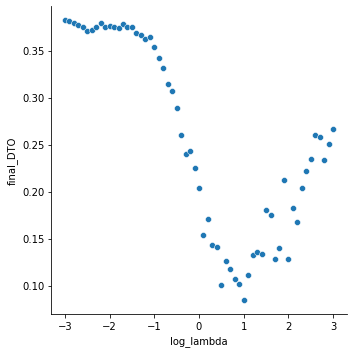

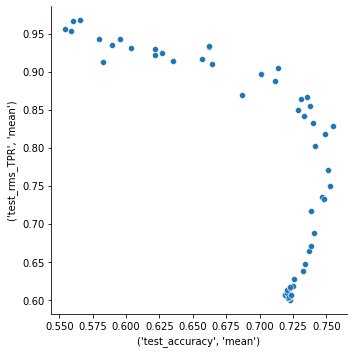

In [9]:
create_plots(
    input_df = Moji_BTGatedAdv_df, 
    )

In [10]:
Moji_GatedDAdv_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"hypertune3/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "hypertune_GDAdv",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    save_path = "results/Moji_GatedDAdv_df.pkl"
    )

index epoch       dev_rms_TPR            \
                                   mean   var        mean       var   
358  (125.89254117941688, 3, 0.1)  28.4  50.8    0.971506  0.000096   

    dev_accuracy             dev_DTO           test_rms_TPR            \
            mean       var      mean       var         mean       var   
358     0.718175  0.000083  0.041085  0.000119     0.959129  0.000242   

    test_accuracy           test_DTO           final_DTO log_lambda  
             mean       var     mean       var                       
358      0.723556  0.000099  0.04495  0.000152  0.059097        2.1

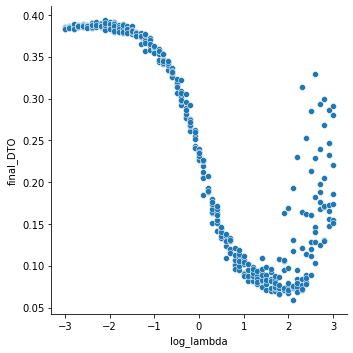

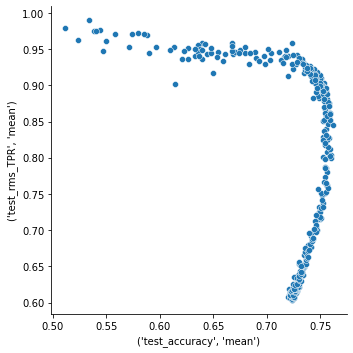

In [11]:
create_plots(
    input_df = Moji_GatedDAdv_df, 
    )

In [12]:
Moji_FairBatch_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"FairBatch/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "FairBatch",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['DyBTObj', 'DyBTalpha', 'DyBTinit'],
    save_path = "results/Moji_FairBatch_df.pkl"
    )

index epoch      dev_rms_TPR            \
                                   mean  var        mean       var   
20  (stratified_y, 0.1, original)   4.0  1.5    0.914526  0.000036   

   dev_accuracy             dev_DTO           test_rms_TPR            \
           mean       var      mean       var         mean       var   
20      0.74605  0.000015  0.014685  0.000129     0.904373  0.000067   

   test_accuracy            test_DTO           final_DTO  
            mean       var      mean       var            
20      0.751488  0.000033  0.024711  0.000138  0.002582

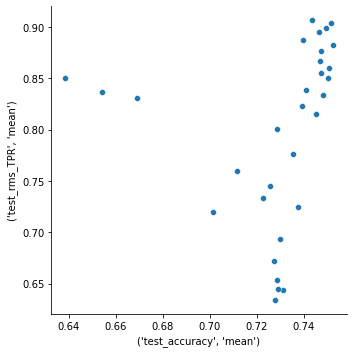

In [13]:
create_plots(
    input_df = Moji_FairBatch_df
    )

In [14]:
Moji_BTFairBatch_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"FairBatch/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "BTInitFairBatch",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['DyBTObj', 'DyBTalpha', 'DyBTinit'],
    save_path = "results/Moji_BTFairBatch_df.pkl"
    )

In [15]:
Moji_OldFairBatch_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"Original_FairBatch/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "checkpoint_epoch",
    model_id= "Original_FairBatch",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['DyBTObj', 'DyBTalpha', 'DyBTinit'],
    save_path = "results/Moji_OldFairBatch_df.pkl",
    n_jobs=0
    )

In [16]:
Moji_INLP_df = model_selection(
    results_dir= r"G:\Experimental_results",
    project_dir= r"INLP/Moji",
    checkpoint_dir= "models",
    checkpoint_name= "INLP",
    model_id= "INLP_True",
    GAP_metric_name = "rms_TPR",
    Performance_metric_name = "accuracy",
    selection_criterion = "DTO",
    index_column_names = ['INLP_by_class', 'INLP_discriminator_reweighting', 'INLP_min_acc'],
    save_path = "results/Moji_INLP_df.pkl",
    n_jobs=0,
    return_all=True
    )

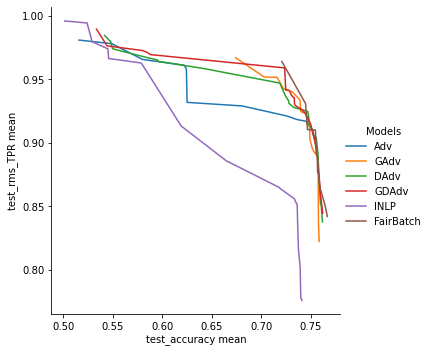

In [17]:
_results_dict = {
    "Adv": Moji_Adv_df,
    "GAdv": Moji_GatedAdv_df,
    "DAdv": Moji_DAdv_df,
    "GDAdv": Moji_GatedDAdv_df,
    # "FairBatch": Moji_FairBatch_df,
    # "BTFairBatch": Moji_BTFairBatch_df,
    "INLP": Moji_INLP_df,
    "FairBatch":Moji_OldFairBatch_df,
}

_final_df = model_comparasion(
    results_dict = _results_dict,
    pareto_selection="test",
    )

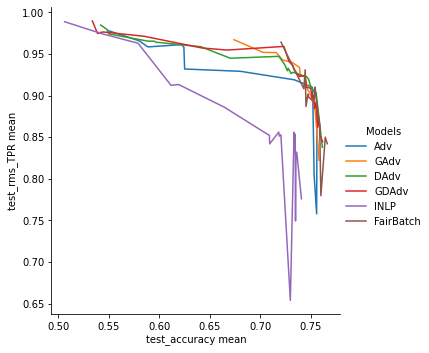

In [18]:
_final_df = model_comparasion(
    results_dict = _results_dict,
    pareto_selection="dev",
    )

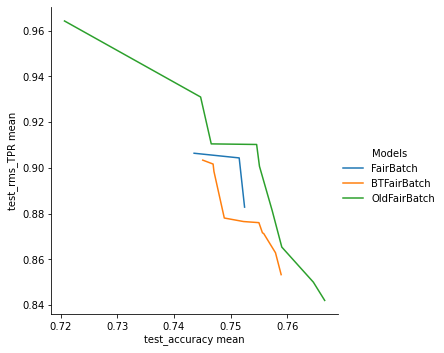

In [19]:
_results_dict = {
    "FairBatch": Moji_FairBatch_df,
    "BTFairBatch": Moji_BTFairBatch_df,
    "OldFairBatch":Moji_OldFairBatch_df,
}

_final_df = model_comparasion(
    results_dict = _results_dict,
    pareto_selection="test",
    )